# Spectral Co-Clustering

Clusters rows and columns of an array X to solve the relaxed normalized cut of the bipartite graph created from X as follows: the edge between row vertex i and column vertex j has weight X[i, j].

The resulting bicluster structure is block-diagonal, since each row and each column belongs to exactly one bicluster.

Supports sparse matrices, as long as they are nonnegative.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_biclusters
from sklearn.cluster import SpectralCoclustering
from sklearn.metrics import consensus_score

Text(0.5, 1.0, 'Original dataset')

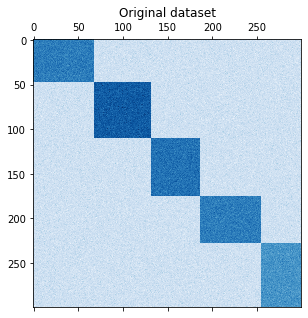

In [2]:
data, rows, columns = make_biclusters(
    shape=(300, 300), n_clusters=5, noise=5, shuffle=False, random_state=0
)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")

Cluster Shuffling

Text(0.5, 1.0, 'Shuffled dataset')

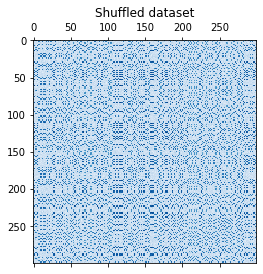

In [3]:
# shuffle clusters
rng = np.random.RandomState(0)
row_idx = rng.permutation(data.shape[0])
col_idx = rng.permutation(data.shape[1])
data = data[row_idx][:, col_idx]

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")

In [5]:
model = SpectralCoclustering(n_clusters=5, random_state=0)
model.fit(data)
score = consensus_score(model.biclusters_, (rows[:, row_idx], columns[:, col_idx]))
print("consensus score: {:.3f}".format(score))

consensus score: 1.000


In [6]:
fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

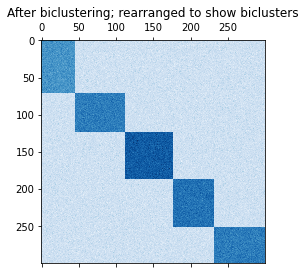

In [7]:
plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")

plt.show()